Para comenzar, importamos los paquetes necesarios para nuestro programa

In [125]:
from pyspark.sql import SparkSession
from matplotlib import pyplot as plt
from datetime import date
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
from pyspark.sql.types import *
from pyspark.sql.functions import udf, pandas_udf, PandasUDFType
spark = SparkSession.builder.getOrCreate()

Introducimos la base de datos que utilizaremos y la filtramos, eliminando las columnas que no nos son de utilidad

In [81]:
df = spark.read.json('data100000.json')
df = df.drop('_id','idplug_base','idunplug_base','track', 'zip_code')

Generamos una nueva base de datos, añadiendole una columna que indica el día de la semana en el que estamos, siendo 0 el lunes y 6 el domingo. A esta nueva base de datos la llamamos df1

In [82]:
def get_weekday(hourtime):

    try:
        year = int(hourtime[:4])
        month = int(hourtime[5:7])
        day = int(hourtime[8:10])

        return date(year, month, day).weekday()
    except BaseException:
        year = int(hourtime[10:14])
        month = int(hourtime[15:17])
        day = int(hourtime[18:20])

        return date(year, month, day).weekday()

day_func = udf(lambda x: get_weekday(x), IntegerType())
df1 = df.withColumn('get_weekday', day_func(df['unplug_hourTime']))

Realizamos lo mismo que para los dias de la semana, pero esta vez para el año. Generamos una nueva base de datos (df2), añadiendole a df1 una columna que nos indica el año. Acto seguido, generamos dos bases de datos diferenciadas, una para 2018 (df2018) y otra para 2020 (df2020)

In [84]:
def get_year(hourtime):
    try:
        year = int(hourtime[:4])
        return year

    except BaseException:
        year = int(hourtime[10:14])
        return year

year_func = udf(lambda x: get_year(x), IntegerType())    
df2 = df1.withColumn('get_year', year_func(df1['unplug_hourTime']))
df2018 = df2.filter(df2['get_year']==2018)
df2020 = df2.filter(df2['get_year']==2020)


En esta sección estoy sacando los graficos de uso de cada estacion (de dejada de bici, en caso de querer la de "cogida" solo habria que cambiar 'idunplug_station' por 'idplug_station'). Para ello genero estacionesxx, agrupando por estaciones y haciendo un recuento del uso de cada una de ellas, despues paso a una lista cada una de las dos columnas de la table y por ultimo genero el grafico.

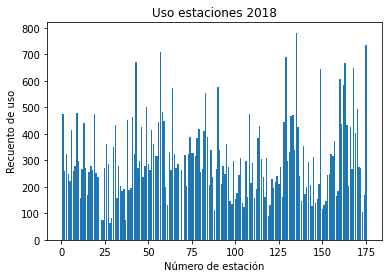

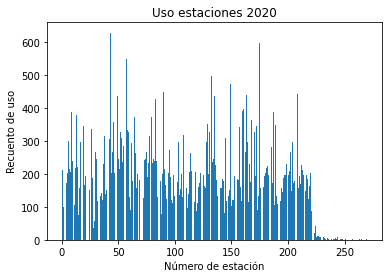

In [85]:
estaciones20 = df2020.groupBy(df2020['idunplug_station']).count()
estaciones18 = df2018.groupBy(df2018['idunplug_station']).count()

est18list = estaciones18.select('idunplug_station').rdd.flatMap(lambda x: x).collect()
count_est18list = estaciones18.select('count').rdd.flatMap(lambda x: x).collect()

est20list = estaciones20.select('idunplug_station').rdd.flatMap(lambda x: x).collect()
count_est20list = estaciones20.select('count').rdd.flatMap(lambda x: x).collect()

fig, ax = plt.subplots()
ax.bar(est18list, count_est18list)
plt.xlabel('Número de estación')
plt.ylabel('Recuento de uso')
plt.title('Uso estaciones 2018')
plt.show()

fig, ax = plt.subplots()
ax.bar(est20list, count_est20list)
plt.xlabel('Número de estación')
plt.ylabel('Recuento de uso')
plt.title('Uso estaciones 2020')
plt.show()


voy  a hacer el tratamiento de datos de edades:
primero hago un recuento del total de personas que usaron la bicicleta cada dia de la semana en cada año

In [107]:
weekday18 = df2018.groupBy('get_weekday').count()
weekday20 = df2020.groupBy('get_weekday').count()


generamos data frames para cada de edad, de manera que podemos ver cuantas personas de cada edad usan la bicicleta cada dia de la semana, para, posteriormente, calcular porcentajes.

In [100]:
edades2018_0 = df2018.filter(df2018['ageRange']== 0)
edades2018_0 = edades2018_0.groupBy(edades2018_0['get_weekday']).count()
edades2018_1 = df2018.filter(df2018['ageRange']== 1)
edades2018_1 = edades2018_1.groupBy(edades2018_1['get_weekday']).count()
edades2018_2 = df2018.filter(df2018['ageRange']== 2)
edades2018_2 = edades2018_2.groupBy(edades2018_2['get_weekday']).count()
edades2018_3 = df2018.filter(df2018['ageRange']== 3)
edades2018_3 = edades2018_3.groupBy(edades2018_3['get_weekday']).count()
edades2018_4 = df2018.filter(df2018['ageRange']== 4)
edades2018_4 = edades2018_4.groupBy(edades2018_4['get_weekday']).count()
edades2018_5 = df2018.filter(df2018['ageRange']== 5)
edades2018_5 = edades2018_5.groupBy(edades2018_5['get_weekday']).count()
edades2018_6 = df2018.filter(df2018['ageRange']== 6)
edades2018_6 = edades2018_6.groupBy(edades2018_6['get_weekday']).count()

edades2020_0 = df2020.filter(df2020['ageRange']== 0)
edades2020_0 = edades2020_0.groupBy(edades2020_0['get_weekday']).count()
edades2020_1 = df2020.filter(df2020['ageRange']== 1)
edades2020_1 = edades2020_1.groupBy(edades2020_1['get_weekday']).count()
edades2020_2 = df2020.filter(df2020['ageRange']== 2)
edades2020_2 = edades2020_2.groupBy(edades2020_2['get_weekday']).count()
edades2020_3 = df2020.filter(df2020['ageRange']== 3)
edades2020_3 = edades2020_3.groupBy(edades2020_3['get_weekday']).count()
edades2020_4 = df2020.filter(df2020['ageRange']== 4)
edades2020_4 = edades2020_4.groupBy(edades2020_4['get_weekday']).count()
edades2020_5 = df2020.filter(df2020['ageRange']== 5)
edades2020_5 =edades2020_5.groupBy(edades2020_5['get_weekday']).count()
edades2020_6 = df2020.filter(df2020['ageRange']== 6)
edades2020_6 = edades2020_6.groupBy(edades2020_6['get_weekday']).count()


calculamos los porcentajes, cogiendo el total de cada dia de la semana de weekdayxx, y la cantidad de uso de cada grupo de personas edadesxxxx_x

In [134]:
weekday18.show()
weekday18_0 = weekday18.filter(weekday18['get_weekday'] == 0)
print(weekday18_0)


+-----------+-----+
|get_weekday|count|
+-----------+-----+
|          1| 8236|
|          6| 5613|
|          3| 8450|
|          5| 5902|
|          4| 7741|
|          2| 8232|
|          0| 8018|
+-----------+-----+

DataFrame[get_weekday: int, count: bigint]
